<a href="https://colab.research.google.com/github/Rahul158625/ML-Lab/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

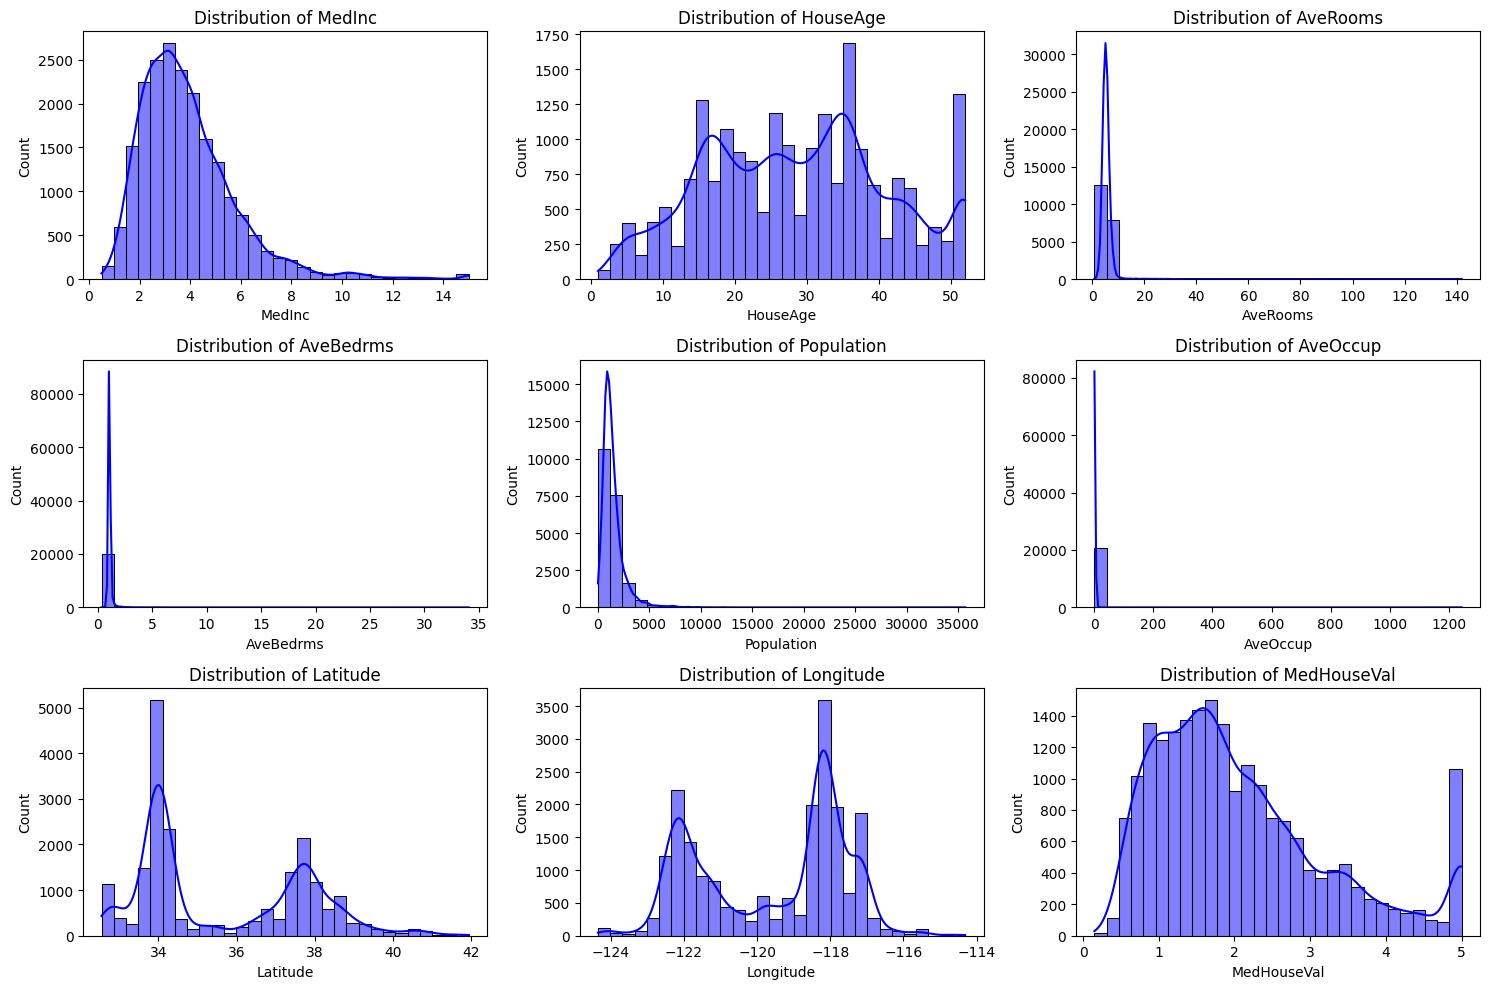

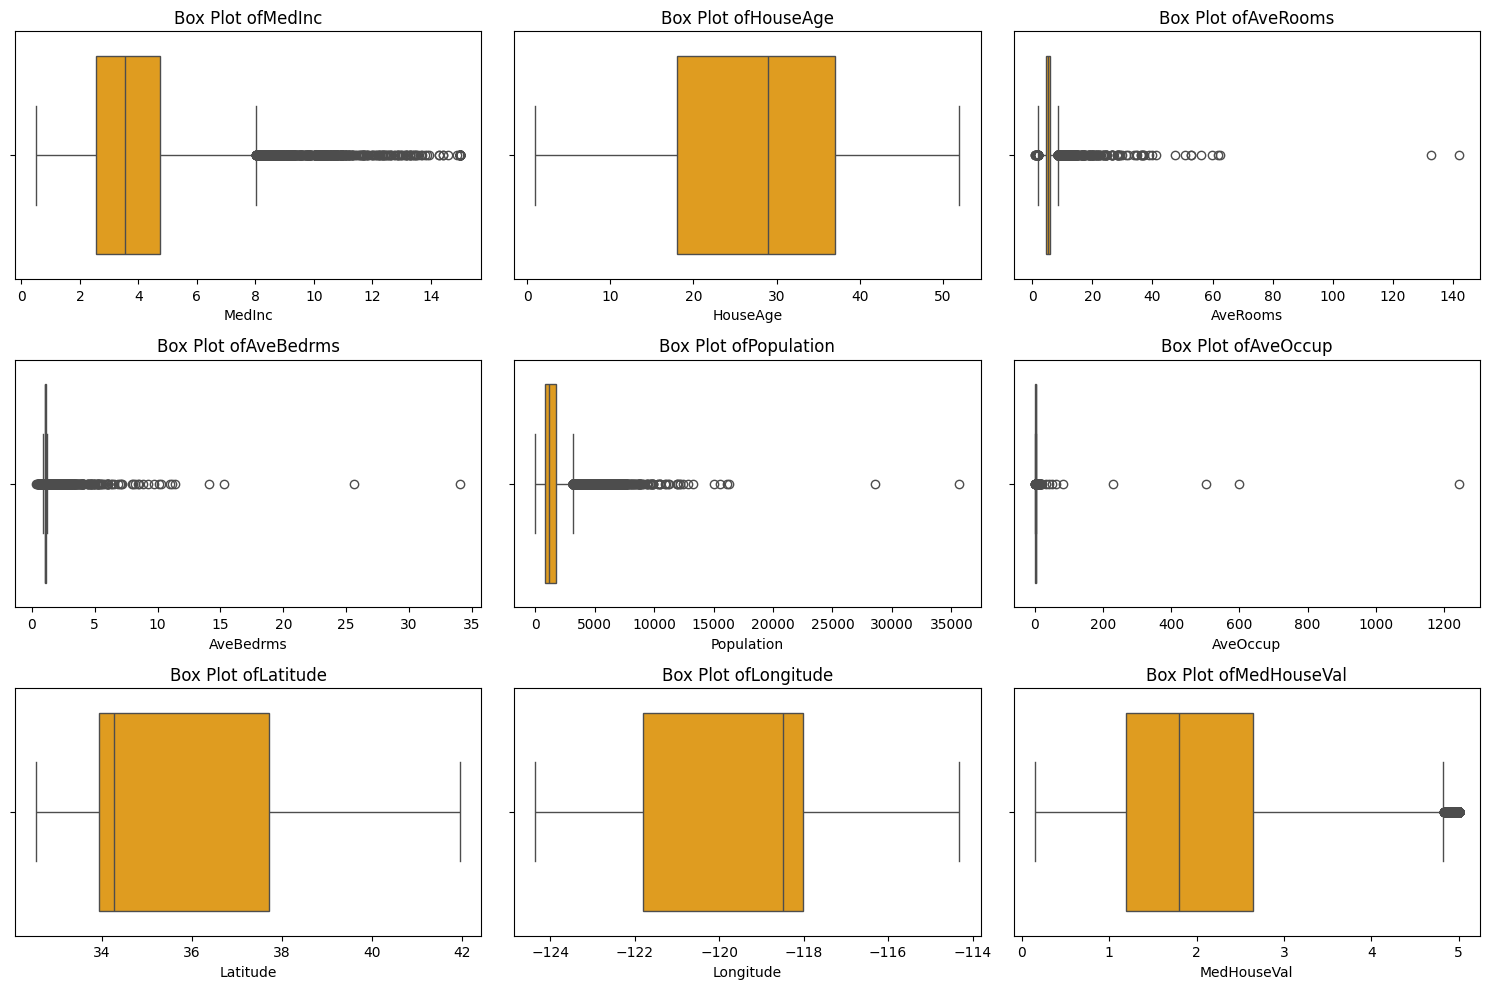

Outliers Dtection:
MedInc:9455 outliers
HouseAge:14296 outliers
AveRooms:6130 outliers
AveBedrms:134 outliers
Population:17349 outliers
AveOccup:867 outliers
Latitude:11928 outliers
Longitude:8956 outliers
MedHouseVal:4783 outliers

 Dataset Summary:
             MedInc      HouseAge  ...     Longitude   MedHouseVal
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data= fetch_california_housing(as_frame=True)
housing_df=data.frame

numerical_features=housing_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(3,3,i+1)
  sns.histplot(housing_df[feature],kde=True, bins=30, color='blue')
  plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=housing_df[feature],color='orange')
  plt.title(f'Box Plot of{feature}')

plt.tight_layout()
plt.show()

print("Outliers Dtection:")
outliers_summary={}
for feature in numerical_features:
  Q1= housing_df[feature].quantile(0.25)
  Q3= housing_df[feature].quantile(0.75)
  IQR=Q3-Q1

  lower_bound =Q1-1.5+IQR
  upper_bound = Q3+1.5+IQR

  outliers=housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)]
  outliers_summary[feature]=len(outliers)
  print(f"{feature}:{len(outliers)} outliers")

print("\n Dataset Summary:")
print(housing_df.describe())
